In [6]:
import sys

sys.path.append("../") 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import rc
from conformal import utils
from plots import utils_plots

import matplotlib.pyplot as plt

import seaborn as sns

from tueplots import bundles
from tueplots import figsizes, fonts, axes, fontsizes, markers


### Load Data

In [2]:
global_plot_args = {"xlabel": "Prob Experts",
             "title": "CIFAR-10 OvA",
             "fig_path": "gradual_overlap_{}.pdf"}

In [3]:
accuracies_ova = utils.load_dict_txt("ova_metrics.txt")
accuracies_ova = {k: np.array(v) for k,v in accuracies_ova.items()}

accuracies_softmax = utils.load_dict_txt("softmax_metrics.txt")
accuracies_softmax = {k: np.array(v) for k,v in accuracies_softmax.items()}

In [4]:
methods = ['standard', 'voting', 'random', 'last', 'ensemble']

In [20]:

# === OLD FIGURE OPTIONS === #
# # Latex Options === #
# rc('font', family='serif')
# rc('text', usetex=True)

# # Matplotlib Options === #
# cm = sns.color_palette("deep")
# global_plot_args = {"marker": "o",
#                     "markeredgecolor": "k",
#                     "markersize": 10,
#                     "linewidth": 8
#                     }
# sns.set_context("notebook", font_scale=1.3)
# fig_size = (7, 7)

# ============================ #
# === AISTATS 2023 OPTIONS === #
# ============================ #
# === Seaborn Color ===
sns.set_palette(sns.color_palette("tab10"))
# sns.set_palette(sns.color_palette("deep"))
# sns.set_palette(sns.color_palette("colorblind"))

# === TUEPLOTS CONFIG ===
# Increase resolution ===
plt.rcParams.update({"figure.dpi": 150})
# Load bundle ===
# plt.rcParams.update(bundles.aistats2023())

# Update figsize ===
# full =
# plt.rcParams.update(figsizes.aistats2023_full())
# half =
plt.rcParams.update(figsizes.aistats2023_half(constrained_layout=False,
                                              tight_layout=True,
                                              height_to_width_ratio=1))  # make square fig.

# FONT ===
# Update font
# font family =
plt.rcParams.update(fonts.aistats2022_tex(family="serif"))
# font size =
plt.rcParams.update(fontsizes.aistats2023(default_smaller=0))
# custom fontsize
# plt.rcParams.update({"font.size": 10})

# AXES ===
plt.rcParams.update(axes.lines(base_width=1,
                               line_base_ratio=4))  # increase base_width for thicker lines
plt.rcParams.update(axes.grid(grid_alpha=0.5))  # custom grid. alpha=0-1, for transparency
# plt.rcParams.update(axes.lines())  # increase base_width for thicker lines

# OTHERS ===
# Markers
# plt.rcParams.update(markers.with_edge())
# Error bars capsize
plt.rcParams.update({"errorbar.capsize": 2})
plt.rcParams.update(markers.with_edge())


In [14]:
figsizes.aistats2023_half(nrows=1, ncols=2, height_to_width_ratio=1)

{'figure.figsize': (3.25, 1.625),
 'figure.constrained_layout.use': True,
 'figure.autolayout': False,
 'savefig.bbox': 'tight',
 'savefig.pad_inches': 0.015}

In [21]:
utils_plots.set_aistats2023_style()

In [30]:
sns.set_palette(sns.color_palette("deep"))


In [40]:
sns.color_palette("tab10")

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [27]:
colors = {"standard": palette[0]}

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)

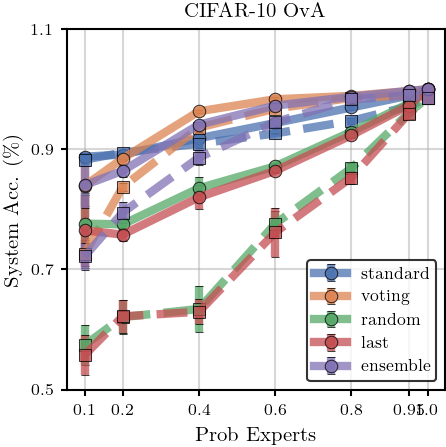

In [41]:
method_list= ['standard', 'voting', 'random', 'last', 'ensemble']
exp_list = [0.1,0.2,0.4,0.6,0.8,0.95,1.0]
cmap = sns.color_palette("deep")
f, ax = plt.subplots(1, 1)
for i, method in enumerate(method_list):
    # Get method accuracies
    acc_np_ova = accuracies_ova[method]
    acc_np_softmax = accuracies_softmax[method]

    # Get mean and std
    acc_ova_mean = acc_np_ova.mean(axis=0)
    acc_ova_std = acc_np_ova.std(axis=0)
    acc_softmax_mean = acc_np_softmax.mean(axis=0)
    acc_softmax_std = acc_np_softmax.std(axis=0)

    # OvA ===
    ova_label = r"{}"
    plt.errorbar(exp_list, acc_ova_mean, yerr=acc_ova_std,
                 alpha=0.75, label=ova_label.format(method), marker="o", linestyle="-", color=cmap[i])
    # Softmax ===
    softmax_label = r"{}"
    plt.errorbar(exp_list, acc_softmax_mean, yerr=acc_softmax_std,
                 alpha=0.75, #label=softmax_label.format(method),
                 marker="s", linestyle="--", color=cmap[i])

plt.xticks(exp_list, exp_list)
plt.yticks(list(plt.yticks()[0])[::2])
plt.ylabel(r'System Acc. ($\%$)')
plt.xlabel(r'{}'.format(global_plot_args["xlabel"]))
plt.title(r'{}'.format(global_plot_args["title"]))
plt.legend(loc="best")
plt.grid()
f.set_tight_layout(True)
plt.legend()
plt.savefig("sys_acc_ova_gradual_overlap.pdf")

In [52]:
# sns.pointplot(data=accuracies_dict["standard"], capsize=0.1)
# sns.pointplot(data=accuracies_dict["voting"], capsize=0.1)
# sns.pointplot(data=accuracies_dict["ensemble"], capsize=0.1)
# sns.pointplot(data=accuracies_dict["random"],  capsize=0.1)
# plt.grid()

### Example

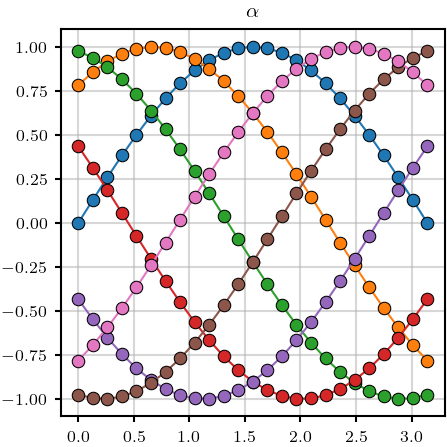

In [10]:
x = np.linspace(0, np.pi, 25)
offsets = np.linspace(0, 2 * np.pi, 7, endpoint=False)
yy = [np.sin(x + phi) for phi in offsets]
fig, ax = plt.subplots()
for y in yy:
    ax.plot(x, y, "o-", linewidth=1)
plt.grid()
plt.title(r"$\alpha$")
plt.show()
fig.savefig("test.pdf")